In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


### handing Data Inbalancess - SmoteTomek links method

In [26]:
df = pd.read_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\pre_processed_df.csv')

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
features = df.drop('Class',axis=1)
target = df['Class']

In [29]:
scaler = StandardScaler()
features[['Time','Amount']] = scaler.fit_transform(features[['Time','Amount']])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=1234)

In [31]:
smt = SMOTETomek(random_state=1234)
features_res, target_res = smt.fit_resample(X_train,y_train)

In [32]:
target_res.value_counts()

Class
0    226606
1    226606
Name: count, dtype: int64

In [33]:
features_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.346138,-1.527320,0.779664,-0.445973,0.643763,1.895486,-0.796104,1.724027,-0.800979,-0.221175,...,-0.226268,-0.138018,0.926099,0.200032,-0.453845,0.250378,-0.391996,0.182858,-0.199368,-0.342983
1,0.623659,-1.519917,0.526017,-0.639762,-0.259347,1.349284,-0.731700,1.163112,0.086371,-0.281868,...,-0.180858,-0.126471,-0.007501,0.190798,-0.732528,0.486099,-0.291913,-0.176798,-0.220036,-0.007479
2,0.670857,-0.514506,1.286994,0.650569,0.540156,1.213316,-0.162808,1.404228,-0.100791,-1.222849,...,-0.053904,0.072625,0.318634,-0.697490,-0.453357,1.150725,-0.216960,0.033738,0.031053,-0.349333
3,0.457845,1.587175,-0.453310,-2.087155,1.451973,0.290527,-1.346326,1.095772,-0.540976,-0.086642,...,0.166244,0.268635,0.310333,-0.215560,-0.017962,0.347086,-0.505316,-0.079331,-0.022545,0.645080
4,1.240748,2.081615,-0.281525,-1.668173,0.141096,0.126756,-0.768274,0.051380,-0.163150,0.524772,...,-0.296539,0.334237,1.105051,-0.158765,-0.415416,0.324267,1.024460,-0.108892,-0.097889,-0.340667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453207,-0.438156,-4.199420,-2.831137,-1.304464,2.485428,7.360099,-4.568866,-7.644665,-0.201740,1.427417,...,-1.759106,0.358443,-0.980397,-11.293976,-0.335949,-2.533825,-0.121599,1.209723,-0.412260,-0.330397
453208,-1.024292,0.298027,0.527967,0.123679,1.214763,0.487041,0.057080,0.238639,0.153748,-0.058039,...,-0.011765,-0.142212,-0.441659,-0.150365,-0.705501,0.353199,-0.341512,-0.010068,0.038963,-0.129005
453209,-1.016059,-0.265991,0.491662,1.858242,-0.951262,-0.517717,-0.692899,0.186822,-0.037716,0.912994,...,-0.012950,0.205589,0.852813,-0.283051,0.450034,0.164694,-0.502587,0.076776,0.015339,-0.346904
453210,-1.129439,-7.474146,5.065303,-8.451348,8.122413,-7.392779,-2.381247,-11.618411,4.739073,-6.645816,...,0.704093,2.254205,0.255692,-0.002442,0.628437,0.049815,0.234262,1.334223,0.288385,-0.317665


In [34]:
smtl_df = pd.concat([features_res, target_res], axis=1)

In [35]:
smtl_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.346138,-1.527320,0.779664,-0.445973,0.643763,1.895486,-0.796104,1.724027,-0.800979,-0.221175,...,-0.138018,0.926099,0.200032,-0.453845,0.250378,-0.391996,0.182858,-0.199368,-0.342983,0
1,0.623659,-1.519917,0.526017,-0.639762,-0.259347,1.349284,-0.731700,1.163112,0.086371,-0.281868,...,-0.126471,-0.007501,0.190798,-0.732528,0.486099,-0.291913,-0.176798,-0.220036,-0.007479,0
2,0.670857,-0.514506,1.286994,0.650569,0.540156,1.213316,-0.162808,1.404228,-0.100791,-1.222849,...,0.072625,0.318634,-0.697490,-0.453357,1.150725,-0.216960,0.033738,0.031053,-0.349333,0
3,0.457845,1.587175,-0.453310,-2.087155,1.451973,0.290527,-1.346326,1.095772,-0.540976,-0.086642,...,0.268635,0.310333,-0.215560,-0.017962,0.347086,-0.505316,-0.079331,-0.022545,0.645080,0
4,1.240748,2.081615,-0.281525,-1.668173,0.141096,0.126756,-0.768274,0.051380,-0.163150,0.524772,...,0.334237,1.105051,-0.158765,-0.415416,0.324267,1.024460,-0.108892,-0.097889,-0.340667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453207,-0.438156,-4.199420,-2.831137,-1.304464,2.485428,7.360099,-4.568866,-7.644665,-0.201740,1.427417,...,0.358443,-0.980397,-11.293976,-0.335949,-2.533825,-0.121599,1.209723,-0.412260,-0.330397,1
453208,-1.024292,0.298027,0.527967,0.123679,1.214763,0.487041,0.057080,0.238639,0.153748,-0.058039,...,-0.142212,-0.441659,-0.150365,-0.705501,0.353199,-0.341512,-0.010068,0.038963,-0.129005,1
453209,-1.016059,-0.265991,0.491662,1.858242,-0.951262,-0.517717,-0.692899,0.186822,-0.037716,0.912994,...,0.205589,0.852813,-0.283051,0.450034,0.164694,-0.502587,0.076776,0.015339,-0.346904,1
453210,-1.129439,-7.474146,5.065303,-8.451348,8.122413,-7.392779,-2.381247,-11.618411,4.739073,-6.645816,...,2.254205,0.255692,-0.002442,0.628437,0.049815,0.234262,1.334223,0.288385,-0.317665,1


In [36]:
fraud = smtl_df[smtl_df['Class']==1]

In [37]:
genuine = smtl_df[smtl_df['Class']==0]

In [38]:
fraud = fraud.sample(97117)

In [39]:
df_balanced = pd.concat([fraud,genuine])
df_balanced = df_balanced.sample(frac=1, random_state=42)

In [40]:
df_balanced['Class'].value_counts()

Class
0    226606
1     97117
Name: count, dtype: int64

In [3]:
df_balanced.to_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\Dataset02.csv') 

NameError: name 'df_balanced' is not defined

In [39]:
df_balanced = pd.read_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\Dataset02.csv')

In [40]:
df_balanced = df_balanced.drop('Unnamed: 0',axis=1)

In [41]:
features2 = df_balanced.drop('Class',axis=1)
target2 = df_balanced['Class']

In [42]:
target2.value_counts()

Class
0    226606
1     97117
Name: count, dtype: int64

In [43]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(features2, target2, test_size = 0.3, random_state=1234)

In [44]:
X_test1.shape

(97117, 30)

In [85]:
X_train1.shape

(226606, 30)

### Model Traning - 01

#### Logistic Regression Model

In [45]:
lgt = LogisticRegression()
lgt.fit(X_train1, y_train1)

LogisticRegression()

In [46]:
y_pred = lgt.predict(X_test1)

In [47]:
accuracy_lgt = accuracy_score(y_test1, y_pred)
precision_lgt = precision_score(y_test1, y_pred)
recall_lgt = recall_score(y_test1, y_pred)
f1_score_lgt = f1_score(y_test1, y_pred)
mcc_lgt = matthews_corrcoef(y_test1, y_pred)

print("Accuracy:", accuracy_lgt)
print("Precision:", precision_lgt)
print("Recall:", recall_lgt)
print("F1-score:", f1_score_lgt)
print("MCC:", mcc_lgt)

Accuracy: 0.9626944819135682
Precision: 0.9758046532371961
Recall: 0.8983132035446676
F1-score: 0.9354568613827873
MCC: 0.9108248348255127


In [48]:
cm_lgt = confusion_matrix(y_test1, y_pred)
print(cm_lgt)

[[67239   651]
 [ 2972 26255]]


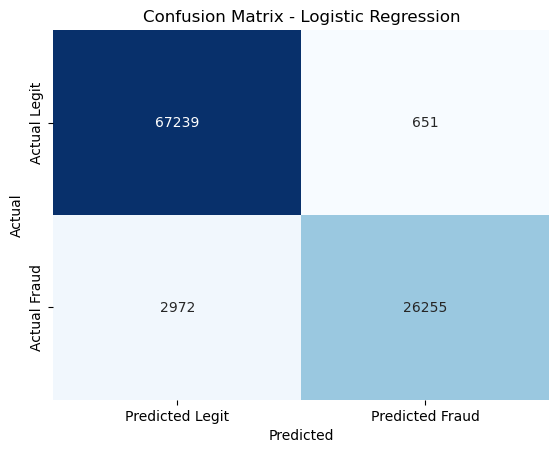

In [49]:
sns.heatmap(cm_lgt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### SVM Model

In [50]:
svm = SVC()

svm.fit(X_train1, y_train1)

SVC()

In [51]:
y_pred_svm = svm.predict(X_test1)

In [52]:
accuracy_svm = accuracy_score(y_test1, y_pred_svm)
precision_svm = precision_score(y_test1, y_pred_svm)
recall_svm = recall_score(y_test1, y_pred_svm)
f1_score_svm = f1_score(y_test1, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test1, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_score_svm)
print("MCC:", mcc_svm)

Accuracy: 0.9843899626224039
Precision: 0.9884372686572426
Recall: 0.9593526533684607
F1-score: 0.9736778136611453
MCC: 0.9628033583669229


In [53]:
cm_svm = confusion_matrix(y_test1, y_pred_svm)
print(cm_svm)

[[67562   328]
 [ 1188 28039]]


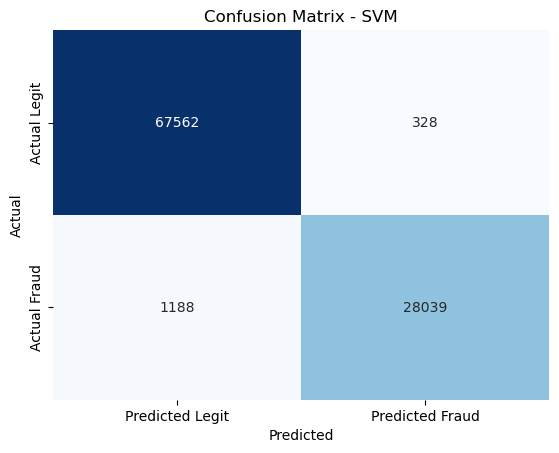

In [54]:
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Decision Tree

In [55]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [56]:
y_pred_dtree = dtree.predict(X_test1)

In [57]:
accuracy_dtree = accuracy_score(y_test1, y_pred_dtree)
precision_dtree = precision_score(y_test1, y_pred_dtree)
recall_dtree = recall_score(y_test1, y_pred_dtree)
f1_score_dtree = f1_score(y_test1, y_pred_dtree)
mcc_dtree = matthews_corrcoef(y_test1, y_pred_dtree)

print("Accuracy:", accuracy_dtree)
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1-score:", f1_score_dtree)
print("MCC:", mcc_dtree)

Accuracy: 0.9967050053028821
Precision: 0.9925034926909053
Recall: 0.9965785061757964
F1-score: 0.9945368252125516
MCC: 0.9921822694694584


In [58]:
cm_dt = confusion_matrix(y_test1, y_pred_dtree)
print(cm_dt)

[[67670   220]
 [  100 29127]]


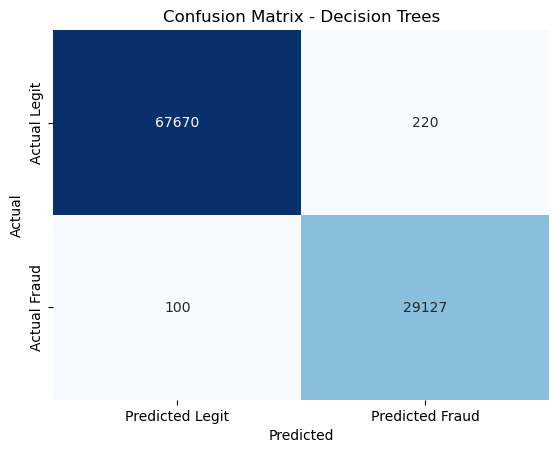

In [59]:
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title('Confusion Matrix - Decision Trees')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### CNN

In [9]:
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [10]:
X_train3 = X_train1.to_numpy()
y_train3 = y_train1.to_numpy()
X_val3 = X_val2.to_numpy()
y_val3 = y_val2.to_numpy()
X_test3 = X_test2.to_numpy()
y_test3 = y_test2.to_numpy()

In [11]:
X_train3= X_train3.reshape(X_train3.shape[0],X_train3.shape[1],1)
X_test3 = X_test3.reshape(X_test3.shape[0],X_test3.shape[1],1)
X_train3.shape, X_test3.shape

((226606, 30, 1), (48559, 30, 1))

In [12]:
X_val3.shape

(48558, 30)

In [1]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.wrappers.scikit_learn import KerasClassifier
import keras_tuner
from tensorflow import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


Using TensorFlow backend


C:\Users\Ravin\AppData\Local\Temp\ipykernel_11656\2457131924.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [13]:
#import model
model=Sequential()

In [14]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [1,3,5]),
        activation='relu',
        input_shape= (X_train1.shape[1],1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [1,3,5]),
        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
  ])

  model.build()

  model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model


In [15]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='D:/Uni Docs/DSC4996/Dynamic_fraud_detection_system/CNN_output',project_name="Hyperparameter Tuning of CNN")

'''tuner = keras_tuner.RandomSearch(
    build_model, 
    objective='val_loss',
    max_trials=5)'''

Reloading Tuner from D:/Uni Docs/DSC4996/Dynamic_fraud_detection_system/CNN_output\Hyperparameter Tuning of CNN\tuner0.json


"tuner = keras_tuner.RandomSearch(\n    build_model, \n    objective='val_loss',\n    max_trials=5)"

In [17]:
tuner.search(X_train3, y_train3, epochs=20, validation_data= (X_val3, y_val3),input_shape = (X_train1.shape[1],1))
#tuner.search(X_train1, y_train1, epochs=20, validation_split = 0.1)

In [18]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [19]:
cnn_best = tuner.hypermodel.build(best_hps)

In [20]:
cnn1 = cnn_best.fit(X_train3, y_train3, epochs = 100, validation_data = (X_val3, y_val3))

Epoch 1/100
7082/7082 [==============================] - 39s 5ms/step - loss: 0.0728 - accuracy: 0.9750 - val_loss: 0.0312 - val_accuracy: 0.9894
Epoch 2/100
7082/7082 [==============================] - 39s 5ms/step - loss: 0.0496 - accuracy: 0.9845 - val_loss: 0.0144 - val_accuracy: 0.9961
Epoch 3/100
7082/7082 [==============================] - 38s 5ms/step - loss: 0.0470 - accuracy: 0.9872 - val_loss: 0.0331 - val_accuracy: 0.9882
Epoch 4/100
7082/7082 [==============================] - 39s 6ms/step - loss: 0.0455 - accuracy: 0.9886 - val_loss: 0.0209 - val_accuracy: 0.9937
Epoch 5/100
7082/7082 [==============================] - 40s 6ms/step - loss: 0.0461 - accuracy: 0.9889 - val_loss: 0.0187 - val_accuracy: 0.9944
Epoch 6/100
7082/7082 [==============================] - 40s 6ms/step - loss: 0.0429 - accuracy: 0.9901 - val_loss: 0.0188 - val_accuracy: 0.9953
Epoch 7/100
7082/7082 [==============================] - 41s 6ms/step - loss: 0.0459 - accuracy: 0.9898 - val_loss: 0.0215 -

In [ ]:
#best_model=tuner.get_best_models(num_models=1)[0]
#best_model(X_train1)

In [22]:
cnn_best.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 112)           672       
                                                                 
 batch_normalization (BatchN  (None, 26, 112)          448       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 112)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 48)            26928     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 48)           192       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 22, 48)           

In [23]:
from matplotlib import pyplot

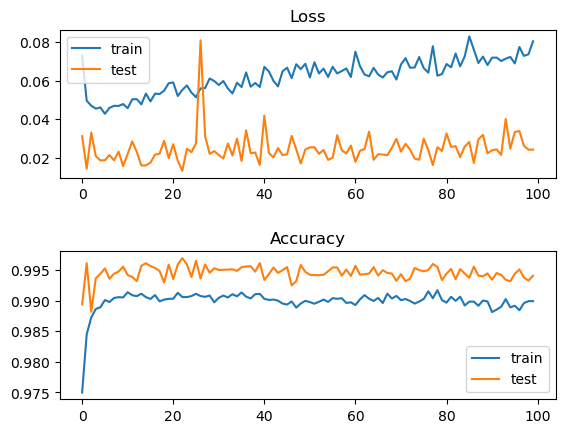

In [24]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(cnn1.history['loss'], label='train')
pyplot.plot(cnn1.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplots_adjust(hspace=0.5)
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(cnn1.history['accuracy'], label='train')
pyplot.plot(cnn1.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

#### CNN with early stopping

In [25]:
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10)


In [26]:
cnn2 = cnn_best.fit(X_train3, y_train3, epochs=100, validation_data=(X_val3,y_val3), callbacks=[early_stopping_cnn])

Epoch 1/100
7082/7082 [==============================] - 38s 5ms/step - loss: 0.0656 - accuracy: 0.9906 - val_loss: 0.0309 - val_accuracy: 0.9952
Epoch 2/100
7082/7082 [==============================] - 38s 5ms/step - loss: 0.0668 - accuracy: 0.9904 - val_loss: 0.0272 - val_accuracy: 0.9930
Epoch 3/100
7082/7082 [==============================] - 40s 6ms/step - loss: 0.0756 - accuracy: 0.9896 - val_loss: 0.0421 - val_accuracy: 0.9935
Epoch 4/100
7082/7082 [==============================] - 39s 6ms/step - loss: 0.0867 - accuracy: 0.9893 - val_loss: 0.0298 - val_accuracy: 0.9945
Epoch 5/100
7082/7082 [==============================] - 40s 6ms/step - loss: 0.0589 - accuracy: 0.9905 - val_loss: 0.0552 - val_accuracy: 0.9960
Epoch 6/100
7082/7082 [==============================] - 41s 6ms/step - loss: 0.0790 - accuracy: 0.9898 - val_loss: 0.0355 - val_accuracy: 0.9923
Epoch 7/100
7082/7082 [==============================] - 40s 6ms/step - loss: 0.0851 - accuracy: 0.9886 - val_loss: 0.0242 -

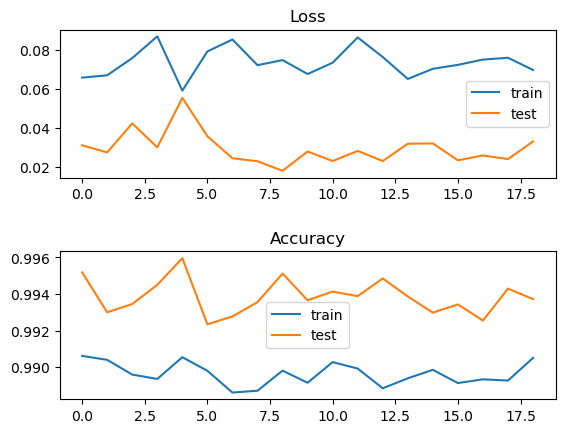

In [27]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(cnn2.history['loss'], label='train')
pyplot.plot(cnn2.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplots_adjust(hspace=0.5)
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(cnn2.history['accuracy'], label='train')
pyplot.plot(cnn2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [28]:
cnn_best.save(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\CNN_output\cnn_best_smtl_with_es.h5')
print("Saved model to disk")

Saved model to disk


In [29]:
y_pred_cnn = cnn_best.predict(X_test3)

1518/1518 [==============================] - 3s 2ms/step


In [30]:
import numpy as np

def predict_classes(probs, threshold=0.5):

  classes = np.zeros_like(probs, dtype=int)
  classes[probs >= threshold] = 1
  return classes


In [31]:
preds = predict_classes(y_pred_cnn)

In [34]:
accuracy_cnn = accuracy_score(y_test3, preds)
precision_cnn = precision_score(y_test3, preds)
recall_cnn = recall_score(y_test3, preds)
f1_score_cnn = f1_score(y_test3, preds)
mcc_cnn = matthews_corrcoef(y_test3, preds)

print("Accuracy:", accuracy_cnn)
print("Precision:", precision_cnn)
print("F1-score:", f1_score_cnn)
print("Recall:", recall_cnn)
print("MCC:", mcc_cnn)

Accuracy: 0.9936366070141477
Precision: 0.979361474752872
F1-score: 0.9895731398683989
Recall: 1.0
MCC: 0.9851058309274957


In [36]:
cm_cnn = confusion_matrix(y_test3, preds)
print(cm_cnn)

[[33587   309]
 [    0 14663]]


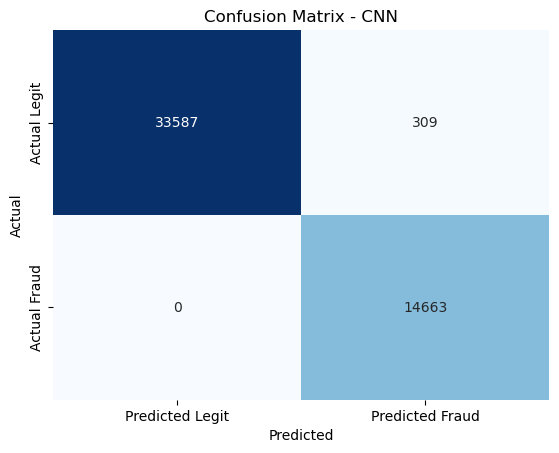

In [37]:
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## LSTM

In [60]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics

In [62]:
df_lstm = pd.read_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\Dataset02.csv')

In [63]:
df_lstm = df_lstm.drop('Unnamed: 0', axis=1)

In [64]:
df_lstm.shape

(323723, 31)

In [65]:
X = df_lstm.drop(['Class'], axis = 'columns')
Label_Data = df_lstm['Class']

In [66]:
X_r2 = StandardScaler().fit_transform(X)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, Label_Data, test_size=0.3)

In [68]:
X_train.shape

(226606, 30)

In [69]:
X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [75]:
# design network
np.random.seed(7)

train_LSTM_X=X_train
val_LSTM_X=X_val

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

train_LSTM_y=y_train
val_LSTM_y=y_val

test_LSTM_X = X_test1.reshape((X_test1.shape[0], 1, X_test1.shape[1]))

In [76]:
inputs = Input((1,30))
x1 = LSTM(50, dropout=0.3, recurrent_dropout=0.2, return_sequences=True)(inputs)
x2 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(x1)
outputs = Dense(1, activation='sigmoid')(x2)
model = Model(inputs, outputs)

In [77]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
lstm1 =model.fit(train_LSTM_X, train_LSTM_y,epochs=100, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
7082/7082 [==============================] - 19s 2ms/step - loss: 0.1020 - accuracy: 0.9627 - val_loss: 0.0505 - val_accuracy: 0.9791
Epoch 2/100
7082/7082 [==============================] - 15s 2ms/step - loss: 0.0655 - accuracy: 0.9744 - val_loss: 0.0336 - val_accuracy: 0.9871
Epoch 3/100
7082/7082 [==============================] - 15s 2ms/step - loss: 0.0532 - accuracy: 0.9795 - val_loss: 0.0223 - val_accuracy: 0.9928
Epoch 4/100
7082/7082 [==============================] - 15s 2ms/step - loss: 0.0458 - accuracy: 0.9825 - val_loss: 0.0198 - val_accuracy: 0.9937
Epoch 5/100
7082/7082 [==============================] - 15s 2ms/step - loss: 0.0414 - accuracy: 0.9844 - val_loss: 0.0166 - val_accuracy: 0.9950
Epoch 6/100
7082/7082 [==============================] - 15s 2ms/step - loss: 0.0387 - accuracy: 0.9853 - val_loss: 0.0133 - val_accuracy: 0.9963
Epoch 7/100
7082/7082 [==============================] - 15s 2ms/step - loss: 0.0359 - accuracy: 0.9866 - val_loss: 0.0128 -

In [79]:
# save model and architecture to single file
model.save(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\LSTM\lstm_Model_smtl_without_es.h5')
print("Saved model to disk")

Saved model to disk


#### training with Early stopping

In [80]:
inputs = Input((1,30))
x1 = LSTM(50, dropout=0.3, recurrent_dropout=0.2, return_sequences=True)(inputs)
x2 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(x1)
outputs = Dense(1, activation='sigmoid')(x2)
model2 = Model(inputs, outputs)

In [81]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=10)

In [83]:
lstm2 = model2.fit(train_LSTM_X, train_LSTM_y, epochs=100, validation_data=(val_LSTM_X, val_LSTM_y), callbacks=[early_stopping_lstm])

Epoch 1/100
7082/7082 [==============================] - 19s 2ms/step - loss: 0.1017 - accuracy: 0.9637 - val_loss: 0.0505 - val_accuracy: 0.9787
Epoch 2/100
7082/7082 [==============================] - 14s 2ms/step - loss: 0.0645 - accuracy: 0.9746 - val_loss: 0.0293 - val_accuracy: 0.9889
Epoch 3/100
7082/7082 [==============================] - 14s 2ms/step - loss: 0.0518 - accuracy: 0.9797 - val_loss: 0.0225 - val_accuracy: 0.9918
Epoch 4/100
7082/7082 [==============================] - 15s 2ms/step - loss: 0.0457 - accuracy: 0.9824 - val_loss: 0.0196 - val_accuracy: 0.9932
Epoch 5/100
7082/7082 [==============================] - 15s 2ms/step - loss: 0.0409 - accuracy: 0.9845 - val_loss: 0.0148 - val_accuracy: 0.9954
Epoch 6/100
7082/7082 [==============================] - 14s 2ms/step - loss: 0.0380 - accuracy: 0.9858 - val_loss: 0.0156 - val_accuracy: 0.9945
Epoch 7/100
7082/7082 [==============================] - 14s 2ms/step - loss: 0.0360 - accuracy: 0.9865 - val_loss: 0.0136 -

In [84]:
# save model and architecture to single file
model2.save(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\LSTM\lstm_Model_smtl_with_es.h5')
print("Saved model to disk")

Saved model to disk


In [85]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\LSTM\lstm_Model_smtl_without_es.h5')
model2 = load_model(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\LSTM\lstm_Model_smtl_with_es.h5')
# summarize model.
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 30)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 50)             16200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 36,451
Trainable params: 36,451
Non-trainable params: 0
_________________________________________________________________


In [86]:
# evaluate the model
_, train_acc = model2.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model2.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.997, Test: 0.996


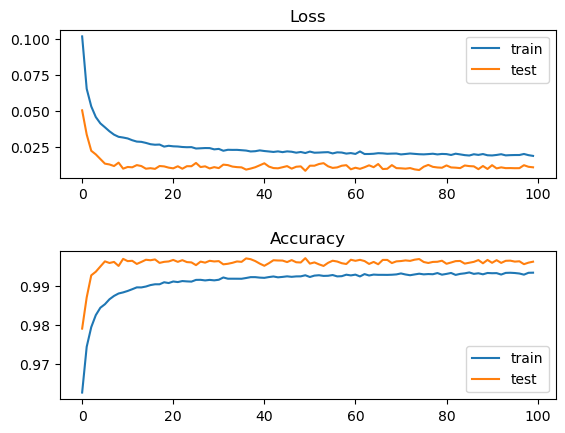

In [87]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(lstm1.history['loss'], label='train')
pyplot.plot(lstm1.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplots_adjust(hspace=0.5)
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(lstm1.history['accuracy'], label='train')
pyplot.plot(lstm1.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

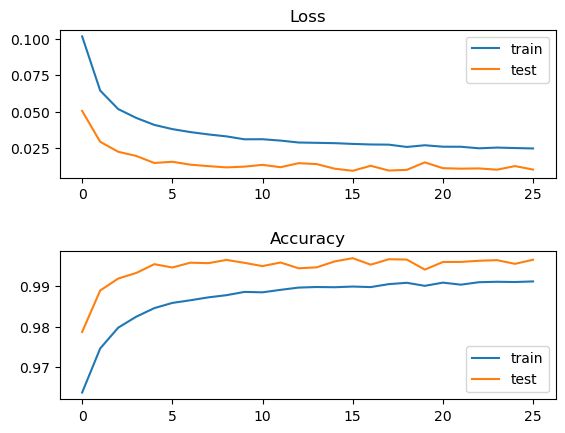

In [88]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(lstm2.history['loss'], label='train')
pyplot.plot(lstm2.history['val_loss'], label='test')
pyplot.legend()

pyplot.subplots_adjust(hspace=0.5)
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(lstm2.history['accuracy'], label='train')
pyplot.plot(lstm2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


In [89]:
# predict probabilities for test set
yhat_probs = model2.predict(test_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [90]:
yhat_classes = (yhat_probs > 0.5).astype(int)

In [91]:
accuracy_lstm = accuracy_score(y_test1, yhat_classes)
print('Accuracy: %f' % accuracy_lstm)
precision_lstm = precision_score(y_test1, yhat_classes)
print('Precision: %f' % precision_lstm)
recall_lstm = recall_score(y_test1, yhat_classes)
print('Recall: %f' % recall_lstm)
f1_score_lstm = f1_score(y_test1, yhat_classes)
print('F1-Score: %f' % f1_score_lstm)
mcc_lstm = matthews_corrcoef(y_test1, yhat_classes)
print('MCC: %f' % mcc_lstm)


Accuracy: 0.996417
Precision: 0.988482
Recall: 0.999726
F1-Score: 0.994072
MCC: 0.991537


In [92]:
cm_lstm = confusion_matrix(y_test1, yhat_classes)

In [93]:
cm_lstm

array([[33796,   170],
       [    4, 14589]], dtype=int64)

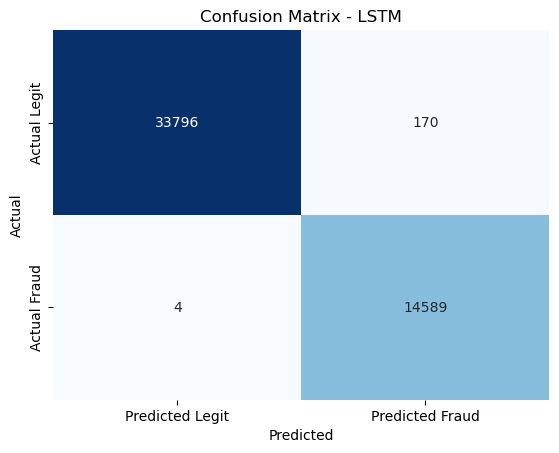

In [94]:
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()